# FASHION CLASS CLASSIFICATION 

## 1. DATA IMPORT
### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Load dataset

In [2]:
df_train = pd.read_csv('input/fashion-mnist_train.csv',sep=',')
df_test = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

## 2. DATA VISUALIZING 

### Display dataframe

784 indicates 28x28 pixels and 1 column for label:

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's check how many data are in train and test datasets:

In [5]:
df_train.shape

(60000, 785)

In [6]:
df_test.shape

(10000, 785)

Let's create training and testing arrays:

In [7]:
training = np.array(df_train, dtype = 'float32')
testing = np.array(df_test, dtype = 'float32')

### Display random images

Below we are going to plot a grid of default figures by defining grid dimensions 15x15. Subplots return figure object and axes object. We can use the axes object to plot specific figures at various locations. Next, 15x15 matrix is flattened into 225 array and length of training dataset is set.
A random number from 0 to n_training is selected and random figure is plotted accordingly.

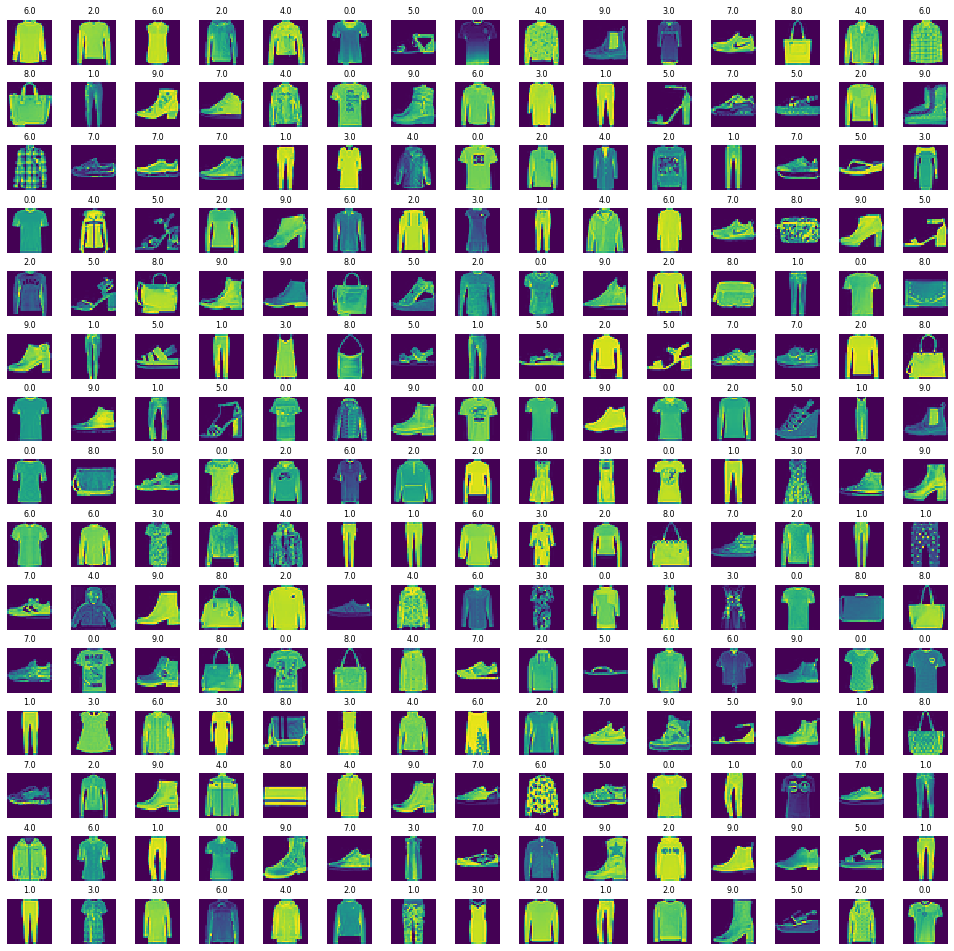

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Classes:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

## 3. MODEL TRAINING

### Prepare train, validation and test datasets

Training and testing datasets are prepared:

In [9]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

Let's create validation dataset. A validaton dataset can be used during training, it is used to help the model to generalize. We would like to simply avoid overfitting.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

Now we are going to take our training, testing and validating data and put in a form that will fit to out convolutional neural network, so we will need to reshape our data so that they are in a form (28,28,1)

In [11]:
X_train.shape

(48000, 784)

In [12]:
X_test.shape

(10000, 784)

In [13]:
X_validate.shape

(12000, 784)

In [14]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [15]:
X_train.shape

(48000, 28, 28, 1)

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_validate.shape

(12000, 28, 28, 1)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


### Create neural network model

In [19]:
cnn_model = Sequential()

After creating our model, we are going to add our layers:
- convolutional layer, with 32 kernels of size 3x3, with input shape equal to our image shape and RELU activation function
- pooling layer, with pool size 2x2
- dropout layer
- flattening layer to flat our features into one single array
- dense layer, with dimension equal to 32 and RELU activation function
- dense layer, with dimension equal to 10 (as we have 10 classes) and sigmoid activation function

In [20]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.
C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  import sys
C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


Now we are going to train our network. As loss function we are going to use sparse_categorical_crossentropy (sparse because our classes are mutually exclusive, categorical and not binary because we have 10 classes). We will choose Adam optimizer cause it is computationally efficient and has little memory requirements - it is quite popular to start with this kind of optimizer as it applies well for many deep learning problems. Accuracy metrics will be used.

### Compile model

In [21]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

### Train model

Number of epochs in this case will be 10. An epoch is a measure of the number of times all of the training vectors are used once to update the weights. The greater number of epochs is, the smaller the error is.

In [22]:
epochs = 10

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 33s 683us/step - loss: 0.9047 - accuracy: 0.6909 - val_loss: 0.5019 - val_accuracy: 0.8251
Epoch 2/10
48000/48000 [==============================] - 30s 634us/step - loss: 0.4677 - accuracy: 0.8347 - val_loss: 0.4195 - val_accuracy: 0.8522
Epoch 3/10
48000/48000 [==============================] - 31s 643us/step - loss: 0.4121 - accuracy: 0.8537 - val_loss: 0.3796 - val_accuracy: 0.8698
Epoch 4/10
48000/48000 [==============================] - 32s 657us/step - loss: 0.3789 - accuracy: 0.8668 - val_loss: 0.3557 - val_accuracy: 0.8775
Epoch 5/10
48000/48000 [==============================] - 30s 633us/step - loss: 0.3570 - accuracy: 0.8744 - val_loss: 0.3357 - val_accuracy: 0.8820
Epoch 6/10
48000/48000 [==============================] - 31s 641us/step - loss: 0.3407 - accuracy: 0.8805 - val_loss: 0.3311 - val_accuracy: 0.8851
Epoch 7/10
48000/48000 [==============================] 

With 10 epochs used, we reached accuracy 89.55% which is pretty good. We might get better accuracy by adding more epochs but for this case we are going to stay with 10 due to the time it takes to calculate it.

## 4. MODEL EVALUATING

### Test data

At first, we will run a method evaluate using our testing data.

In [23]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Loss: {:.3f}'.format(evaluation[0]))
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 346us/step
Loss: 0.294
Test Accuracy: 0.901


Let's get the predictions for the test data:

In [24]:
predicted_classes = cnn_model.predict_classes(X_test)

Now let's print sample 25 images to see how our model performs (prediction class vs. true class):

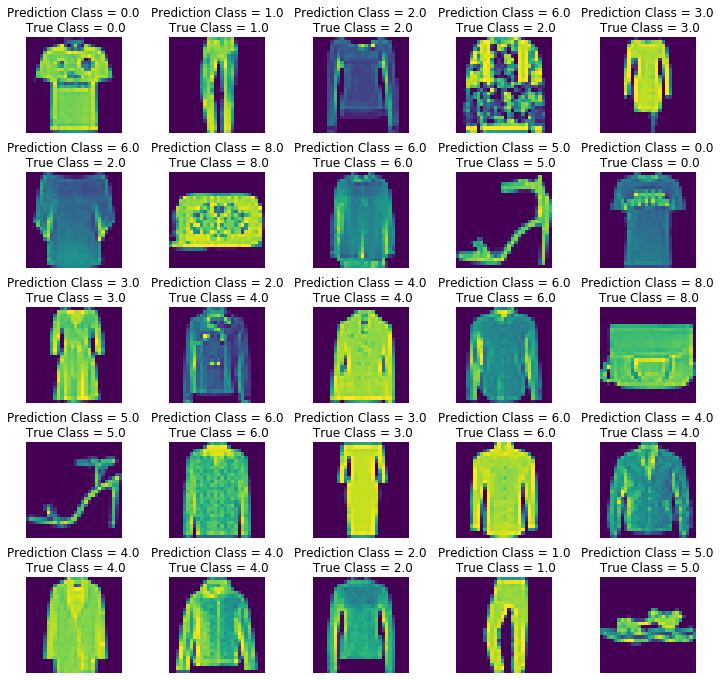

In [25]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

### Print heatmap

(10.0, 0.0)

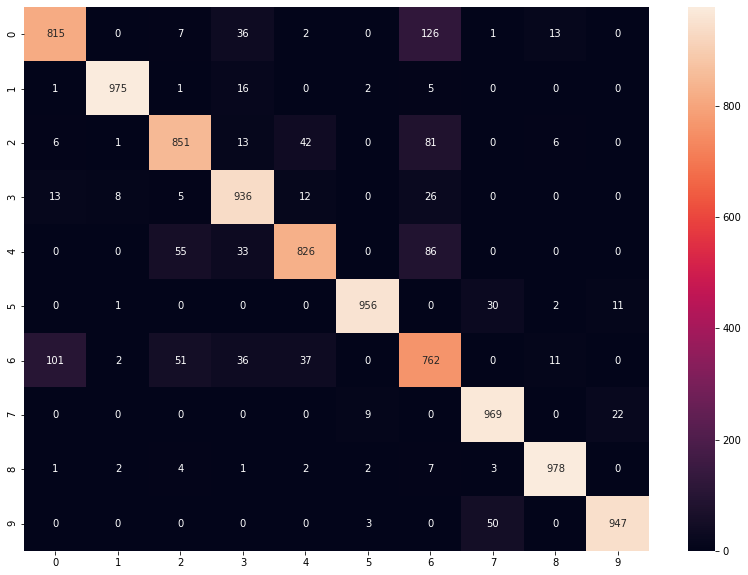

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
ax = sns.heatmap(cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In order to get the total value of correctly classified, numbers of the confusion matrix diagonal should be added. We can observe, however, that many samples hasn't been classified correctly.

### Print classification report

In [27]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class: {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Class: 0       0.87      0.81      0.84      1000
    Class: 1       0.99      0.97      0.98      1000
    Class: 2       0.87      0.85      0.86      1000
    Class: 3       0.87      0.94      0.90      1000
    Class: 4       0.90      0.83      0.86      1000
    Class: 5       0.98      0.96      0.97      1000
    Class: 6       0.70      0.76      0.73      1000
    Class: 7       0.92      0.97      0.94      1000
    Class: 8       0.97      0.98      0.97      1000
    Class: 9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Classification report show how many classes for th specific class has been classified correctly. Most common misclassification was between 0 and 6 classes (T-shirt misclassified with shirt). We got best results for class 1, 5, 8 (trousers, sandals, bags).